# <font color = "BLUE"> Projeto 3 - Identificador de pokémons para uma batalha </font>

#### Integrantes: 

Fernando Elias Sanches
   
Maurício Hiroki Ando


Theo Barbara Rodrigues


## <font color = "BLUE"> Importando os dados </font> 

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

pokedex=pd.read_csv("Pokemon.csv")

## <font color = "BLUE"> Análise inicial os dados </font>

Pokémons disponíveis:800


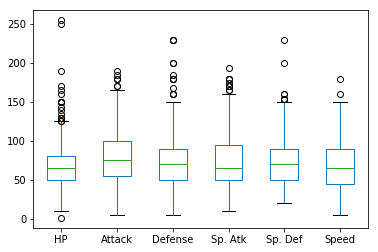

In [2]:
del(pokedex["#"])
del(pokedex["Total"])
del(pokedex["Generation"])
del(pokedex["Legendary"])
pokedex.plot.box();
print("Pokémons disponíveis:{}".format(len(pokedex)))

Nota-se que, através da análise dos atributos de ataque, defesa, velocidade, HP, ataque especial, defesa especial; podemos observar que a grande maioria dos pokémons se encontram dentro do interquantil. Podemos ver que são poucos os pokémons que estão fora da curva em cada atributo, dado que existem cerca de 800 pokémons no dataset.

Nosso objetivo do projeto é, dado um pokémon, identificar outros pokémons que se parecem com aquele. Logo, como estamos mexendo com agrupamento de dados (pois para encontrar os parecidos, estamos levando em conta os status dos pokémons). De início, será interessante observar o comportamento de agrupamento de pokémons considerando apenas seus status. Mais para o final, respondendo a pergunta, teremos que agrupar os pokémons parecidos dado as características do pokémon adversário, tentando encontrar o grupo que melhor se destaca numa batalha contra tal adversário.

## <font color = "BLUE"> Clusterização dos dados </font>

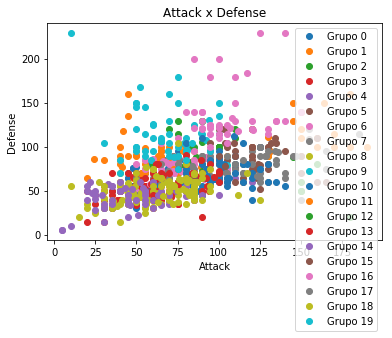

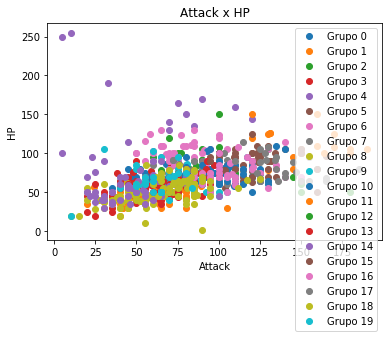

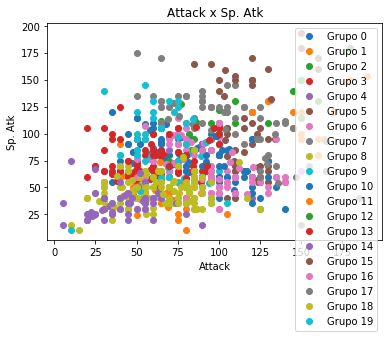

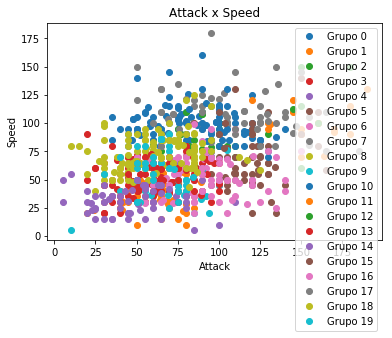

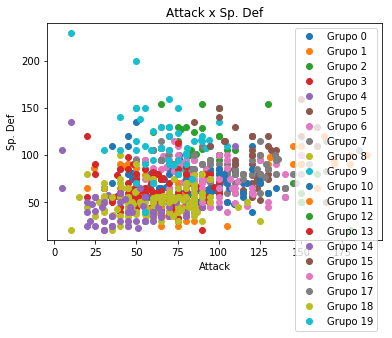

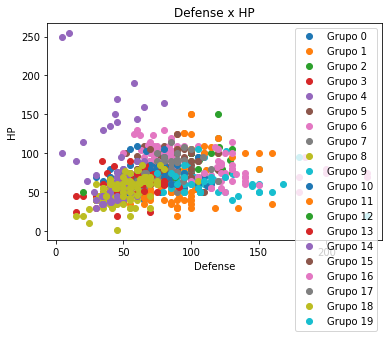

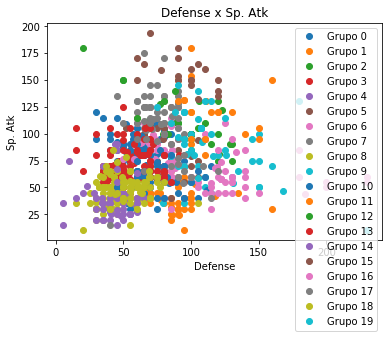

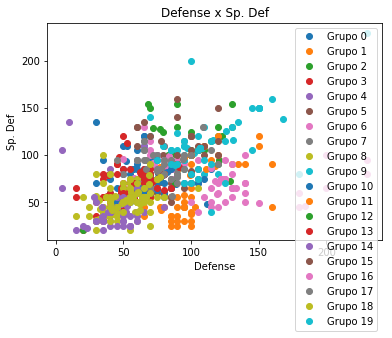

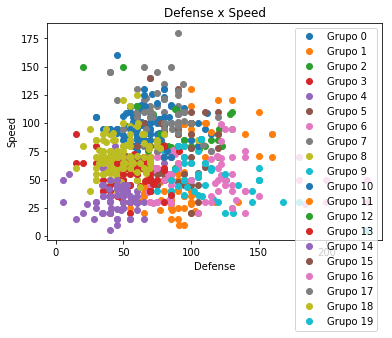

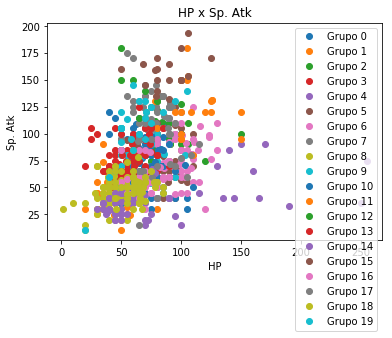

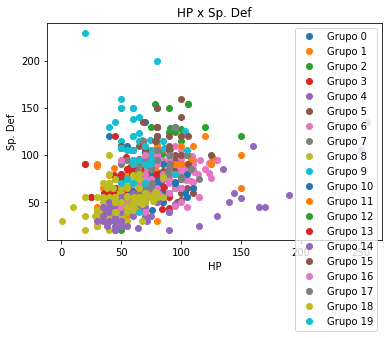

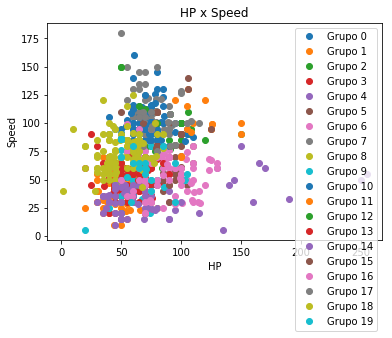

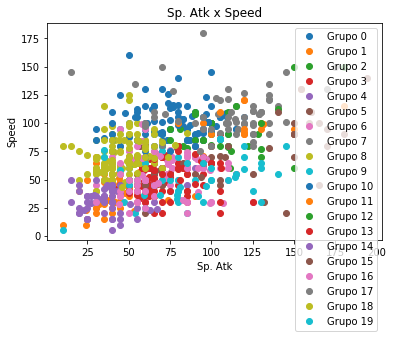

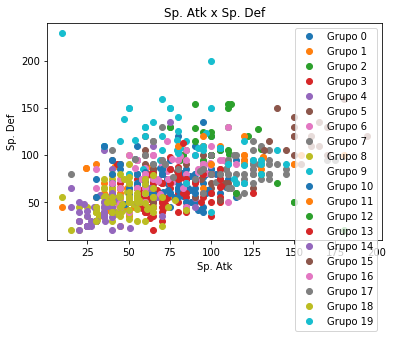

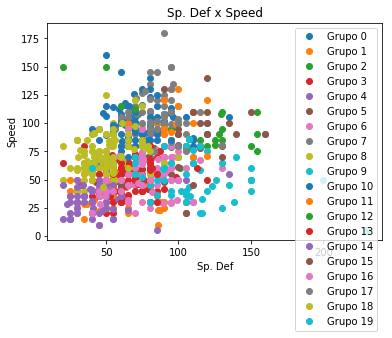

In [53]:
#Código baseado em "clustering_SKL.ipynb" da aula 27
#Analisaremos o comportamento dos clusters, comparado de dois a dois, com um total de 15 gráficos.

dados_entrada = pokedex.loc[:,("Attack", "Defense", "Sp. Atk","Sp. Def",'Speed',"HP")] #Estamos agrupando os dados com base nos status
ten_means = cluster.MiniBatchKMeans(n_clusters=20)
ten_means.fit(dados_entrada)
saida = ten_means.predict(dados_entrada)
conjunto = dados_entrada.copy()
conjunto["saida"] = saida
pokedex['saida'] = saida

grupo0 = conjunto[conjunto.saida==0]
grupo1 = conjunto[conjunto.saida==1]
grupo2 = conjunto[conjunto.saida==2]
grupo3 = conjunto[conjunto.saida==3]
grupo4 = conjunto[conjunto.saida==4]
grupo5 = conjunto[conjunto.saida==5]
grupo6 = conjunto[conjunto.saida==6]
grupo7 = conjunto[conjunto.saida==7]
grupo8 = conjunto[conjunto.saida==8]
grupo9 = conjunto[conjunto.saida==9]
grupo10 = conjunto[conjunto.saida==10]
grupo11 = conjunto[conjunto.saida==11]
grupo12 = conjunto[conjunto.saida==12]
grupo13 = conjunto[conjunto.saida==13]
grupo14 = conjunto[conjunto.saida==14]
grupo15 = conjunto[conjunto.saida==15]
grupo16 = conjunto[conjunto.saida==16]
grupo17 = conjunto[conjunto.saida==17]
grupo18 = conjunto[conjunto.saida==18]
grupo19 = conjunto[conjunto.saida==19]
# grupo20 = conjunto[conjunto.saida==20]
# grupo21 = conjunto[conjunto.saida==21]
# grupo22 = conjunto[conjunto.saida==22]
# grupo23 = conjunto[conjunto.saida==23]
# grupo24 = conjunto[conjunto.saida==24]

#Comparar de dois a dois (combinação de 6 dois a dois)
def plota_grafico(atributo1, atributo2):
    plt.plot(grupo0["{}".format(atributo1)], grupo0["{}".format(atributo2)], "o", label='Grupo 0')
    plt.plot(grupo1["{}".format(atributo1)], grupo1["{}".format(atributo2)], "o", label='Grupo 1')
    plt.plot(grupo2["{}".format(atributo1)], grupo2["{}".format(atributo2)], "o", label='Grupo 2')
    plt.plot(grupo3["{}".format(atributo1)], grupo3["{}".format(atributo2)], "o", label='Grupo 3')
    plt.plot(grupo4["{}".format(atributo1)], grupo4["{}".format(atributo2)], "o", label='Grupo 4')
    plt.plot(grupo5["{}".format(atributo1)], grupo5["{}".format(atributo2)], "o", label='Grupo 5')
    plt.plot(grupo6["{}".format(atributo1)], grupo6["{}".format(atributo2)], "o", label='Grupo 6')
    plt.plot(grupo7["{}".format(atributo1)], grupo7["{}".format(atributo2)], "o", label='Grupo 7')
    plt.plot(grupo8["{}".format(atributo1)], grupo8["{}".format(atributo2)], "o", label='Grupo 8')
    plt.plot(grupo9["{}".format(atributo1)], grupo9["{}".format(atributo2)], "o", label='Grupo 9')
    plt.plot(grupo10["{}".format(atributo1)], grupo10["{}".format(atributo2)], "o", label='Grupo 10')
    plt.plot(grupo11["{}".format(atributo1)], grupo11["{}".format(atributo2)], "o", label='Grupo 11')
    plt.plot(grupo12["{}".format(atributo1)], grupo12["{}".format(atributo2)], "o", label='Grupo 12')
    plt.plot(grupo13["{}".format(atributo1)], grupo13["{}".format(atributo2)], "o", label='Grupo 13')
    plt.plot(grupo14["{}".format(atributo1)], grupo14["{}".format(atributo2)], "o", label='Grupo 14') 
    plt.plot(grupo15["{}".format(atributo1)], grupo15["{}".format(atributo2)], "o", label='Grupo 15')
    plt.plot(grupo16["{}".format(atributo1)], grupo16["{}".format(atributo2)], "o", label='Grupo 16')
    plt.plot(grupo17["{}".format(atributo1)], grupo17["{}".format(atributo2)], "o", label='Grupo 17')
    plt.plot(grupo18["{}".format(atributo1)], grupo18["{}".format(atributo2)], "o", label='Grupo 18')
    plt.plot(grupo19["{}".format(atributo1)], grupo19["{}".format(atributo2)], "o", label='Grupo 19')
#     plt.plot(grupo20["{}".format(atributo1)], grupo20["{}".format(atributo2)], "o", label='Grupo 20')
#     plt.plot(grupo21["{}".format(atributo1)], grupo21["{}".format(atributo2)], "o", label='Grupo 21')
#     plt.plot(grupo22["{}".format(atributo1)], grupo22["{}".format(atributo2)], "o", label='Grupo 22')
#     plt.plot(grupo23["{}".format(atributo1)], grupo23["{}".format(atributo2)], "o", label='Grupo 23')
#     plt.plot(grupo24["{}".format(atributo1)], grupo24["{}".format(atributo2)], "o", label='Grupo 24')
    
    plt.xlabel("{}".format(atributo1))
    plt.ylabel("{}".format(atributo2))
    plt.title("{} x {}".format(atributo1,atributo2))
    plt.legend()
    plt.show()
plota_grafico("Attack","Defense")
plota_grafico("Attack","HP")
plota_grafico("Attack","Sp. Atk")
plota_grafico("Attack", "Speed")
plota_grafico("Attack","Sp. Def")
plota_grafico("Defense","HP")
plota_grafico("Defense","Sp. Atk")
plota_grafico("Defense","Sp. Def")
plota_grafico("Defense","Speed")
plota_grafico("HP", "Sp. Atk")
plota_grafico("HP","Sp. Def")
plota_grafico("HP", "Speed")
plota_grafico("Sp. Atk","Speed")
plota_grafico("Sp. Atk", "Sp. Def")
plota_grafico("Sp. Def", "Speed")

Podemos observar que a clusterização acima não separa exatamente os pokémons como imagenávamos, isto é, não é possível ver, de fato, grupos bem separados nos gráficos. No entanto, é possível observar que existem dados que se aproximam de outros, ou seja, há pokémons parecidos, mas que alguns ainda possuem alguma coisa parecida com outros grupos, o que justifica a proximidade dos grupos. Pois bem, nos falta fazer a análise de clusters considerando uma batalha de pokémons. Para tanto, é necessário analisar os pontos fracos e pontos fortes  de cada pokémon. O código abaixo recebe o nome de um pokémon e rretorna o grupo de pokémons parecidos com ele, de acordo com o status, apenas.

In [5]:
pokemon = input("Digite o nome do pokémon, com letra maiúscula: ")
grupo_repetido=[]
grupo_solo=[]
saida_do_pokemon=(pokedex[pokedex.Name==pokemon].saida)
if len(saida_do_pokemon)!=0:
    for element in pokedex.saida:
        if element == int(saida_do_pokemon):
            nome_real = pokedex[pokedex["saida"]==element].Name
            grupo_repetido.append(nome_real)
    for p in grupo_repetido[0]:
        grupo_solo.append(p)
    print("Os pokémons parecidos com {} são: {}".format(pokemon, grupo_solo))
else:
    print("Esse pokémon não existe ou o nome foi digitado de forma incorreta.")

Digite o nome do pokémon, com letra maiúscula: P
Esse pokémon não existe ou o nome foi digitado de forma incorreta.


Como já dito antes, o nosso objetivo não é identificar grupos parecidos de acordo com status, mas sim, pokémons parecidos na seguinte situação: dado um pokémon adversário, quais seriam os melhores pokémons para a batalha? Para responder tal pergunta, será necessário encontrar o ponto fraco, ponto forte e ataques sem efeitos de cada pokémon. 

## <font color="BLUE"> Identificando os ponto fracos dos pokémons </font>

In [6]:
deck=6

Pokemons={'Fairy':[],'Grass':[],'Fire':[],'Flying':[],'Dark':[],'Ghost':[],'Psychic':[],'Bug':[],'Dragon':[],'Ice':[],\
          'Electric':[],'Poison':[],'Rock':[],'Ground':[],'Steel':[],'Normal':[],'Water':[],'Fighting':[]}

#Separação do pokémon por tipo
def ClassificaPokemon(dicionario):
    for tipo in dicionario:
        for pokemon in pokedex.Name:
            linha=pokedex[pokedex.Name==pokemon]
            if linha['Type 1'].all()==tipo or linha['Type 2'].all()==tipo:
                dicionario[tipo].append(pokemon)
ClassificaPokemon(Pokemons)

In [7]:
#Dado um pokemon, identifica-se seu tipo composto (se tiver um tipo 2, por exemplo, tipo fire e tipo fighting)
def ClassificaTipoComposto(pokemon):
    tipo1=pokedex[pokedex.Name==pokemon]['Type 1'].all()
    tipo2=pokedex[pokedex.Name==pokemon]['Type 2'].all()
    return tipo1,tipo2


#Define o ponto fraco de cada tipo de pokemon. REferencias de fraqueza baseadas no site: https://pokemondb.net/type
def PontoFracoPorTipo(tipo):
    if tipo=='Fairy':
        ponto_fraco=['Poison','Steel']
        ponto_forte=['Fighting','Bug','Dark']
        no_effect=['Dragon']
    elif tipo=='Ground':
        ponto_fraco=['Water','Grass','Ice',]
        ponto_forte=['Fighting','Bug','Dark']
        no_effect=['Electric']
    elif tipo=='Fire':
        ponto_fraco=['Water','Ground','Rock']
        ponto_forte=['Fire','Grass','Ice','Bug','Steel','Fairy']
        no_effect=['None']
    elif tipo=='Water':
        ponto_fraco=['Electric','Grass']
        ponto_forte=['Fire','Water','Steel','Ice']
        no_effect=['None']
    elif tipo=='Flying':
        ponto_fraco=['Electric','Ice','Rock']
        ponto_forte=['Grass','Fighting','Bug']
        no_effect=['Ground']
    elif tipo=='Dark':
        ponto_fraco=['Fighting','Bug','Fairy']
        ponto_forte=['Ghost','Dark']
        no_effect=['Psychic']
    elif tipo=='Ghost':
        ponto_fraco=['Ghost','Dark']
        ponto_forte=['Poison','Bug']
        no_effect=['Normal','Fighting']
    elif tipo=='Psychic':
        ponto_fraco=['Bug','Ghost','Dark']
        ponto_forte=['Fighting','Psychic']
        no_effect=['None']
    elif tipo=='Bug':
        ponto_fraco=['Fire', 'Flying','Rock']
        ponto_forte=['Grass','Fighting','Ground']
        no_effect=['None']
    elif tipo=='Ice':
        ponto_fraco=['Fighting','Fire','Rock','Steel']
        ponto_forte=['Ice']
        no_effect=['None']
    elif tipo=='Electric':
        ponto_fraco=['Ground']
        ponto_forte=['Electric','Steel']
        no_effect=['None']
    elif tipo=='Poison':
        ponto_fraco=['Psychic','Ground']
        ponto_forte=['Grass','Fighting','Poison','Bug','Fairy']
        no_effect=['None']
    elif tipo=='Rock':
        ponto_fraco=['Fighting','Ground','Water','Steel','Grass']
        ponto_forte=['Normal','Fire','Poison','Flying']
        no_effect=['None']
    elif tipo=='Grass':
        ponto_fraco=['Fire','Flying','Ice','Poison','Bug']
        ponto_forte=['Grass','Water','Electric','Ground']
        no_effect=['None']
    elif tipo=='Steel':
        ponto_fraco=['Fire','Fighting','Ground']
        ponto_forte=['Normal','Grass','Ice','Flying','Psychic','Bug','Rock','Dragon','Steel','Fairy']
        no_effect=['Poison']
    elif tipo=='Normal':
        ponto_fraco=['Fighting']
        ponto_forte=['None']
        no_effect=['Ghost']
    elif tipo=='Fighting':
        ponto_fraco=['Flying','Psychic','Fairy']
        ponto_forte=['Bug','Rock','Dark']
        no_effect=['None']
    elif tipo=='Water':
        ponto_fraco=['Grass','Electric']
        ponto_forte=['Water','Ice','Fire','Steel']
        no_effect=['None']
    else:
        ponto_fraco=['None']
        ponto_forte=['None']
        no_effect=['None']
    return ponto_fraco,ponto_forte,no_effect

In [15]:
#Dado um pokemon, retorna-se seu ponto fraco
def PontosReais(pokemon):
    tipos=ClassificaTipoComposto(pokemon)
    tipo1=tipos[0]
    tipo2=tipos[1]
    first=PontoFracoPorTipo(tipo1)
    second=PontoFracoPorTipo(tipo2)
    ponto_fraco_temporario=set(first[0]+second[0])
    ponto_forte_temporario=set(first[1]+second[1])
    resistencia=set(first[2]+second[2])
    ponto_fraco_real=[]
    ponto_forte_real=[]
    for elemento in ponto_fraco_temporario:
        if elemento not in second[1]:
            if elemento not in second[2]:
                if elemento not in first[1]:
                    if elemento not in first[2]:
                        ponto_fraco_real.append(elemento)
    for elemento in ponto_forte_temporario:
        if elemento not in second[0]:
            if elemento not in second[2]:
                if elemento not in first[0]:
                    if elemento not in first[2]:
                        ponto_forte_real.append(elemento)
    return ponto_fraco_real, ponto_forte_real,resistencia

In [35]:
nova_tabela=pokedex.copy()
del(nova_tabela['Attack'])
del(nova_tabela['Sp. Atk'])
del(nova_tabela['saida'])

In [ ]:
pokemon = input("Qual seu pokémon adversário? ")
nome_do_pokemon=(pokedex[pokedex.Name==pokemon])
Ataque=[]
Special_ataque=[]
if len(nome_do_pokemon)!=0:
    weakness=PontosReais(pokemon)[0]
    strength = PontosReais(pokemon)[1]
    super_resistance=PontosReais(pokemon)[2]
    print("Weakness:{}\nStrength:{}\nResistance:{}".format(weakness,strength,super_resistance))
    for pocket_monster in nova_tabela.Name:
        tipo1,tipo2=ClassificaTipoComposto(pocket_monster)
        if tipo1 in weakness or tipo2 in weakness:
            Ataque.append(int(pokedex[pokedex['Name']==pocket_monster].Attack)*2)
            Special_ataque.append(int(pokedex[pokedex['Name']==pocket_monster]["Sp. Atk"])*2)
        elif tipo1 in strength or tipo2 in strength:
            Ataque.append(int(pokedex[pokedex['Name']==pocket_monster].Attack)*(1/2))
            Special_ataque.append(int(pokedex[pokedex['Name']==pocket_monster]["Sp. Atk"])*(1/2))
        elif tipo1 in super_resistance or tipo2 in super_resistance:
            Ataque.append(0)
            Special_ataque.append(0)
        else:
            Ataque.append(int(pokedex[pokedex['Name']==pocket_monster].Attack))
            Special_ataque.append(int(pokedex[pokedex['Name']==pocket_monster]["Sp. Atk"]))
    nova_tabela['Attack']=Ataque
    nova_tabela['Sp. Atk']=Special_ataque
    print(nova_tabela)
else:
    print("Pokémon não encontrado. Verifique se a escrita está correta")

In [55]:
nova_tabela

,Name,Type 1,Type 2,HP,Defense,Sp. Def,Speed,Attack,Sp. Attack
0,Bulbasaur,Grass,Poison,45,49,65,45,24.5,32.5
1,Ivysaur,Grass,Poison,60,63,80,60,31.0,40.0
2,Venusaur,Grass,Poison,80,83,100,80,41.0,50.0
3,VenusaurMega Venusaur,Grass,Poison,80,123,120,80,50.0,61.0
4,Charmander,Fire,NaN,39,43,50,65,52.0,60.0
5,Charmeleon,Fire,NaN,58,58,65,80,64.0,80.0
6,Charizard,Fire,Flying,78,78,85,100,84.0,109.0
7,CharizardMega Charizard X,Fire,Dragon,78,111,85,100,130.0,130.0
8,CharizardMega Charizard Y,Fire,Flying,78,78,115,100,104.0,159.0
9,Squirtle,Water,NaN,44,65,64,43,48.0,50.0


In [57]:
dados_entrada = nova_tabela.loc[:,("Attack", "Defense", "Sp. Atk","Sp. Def",'Speed',"HP")] #Estamos agrupando os dados com base nos status
dados_entrada
# ten_means = cluster.MiniBatchKMeans(n_clusters=20)
# ten_means.fit(dados_entrada)
# saida = ten_means.predict(dados_entrada)
# conjunto = dados_entrada.copy()
# conjunto["saida"] = saida
# nova_tabela['saida'] = saida

# grupo0 = conjunto[conjunto.saida==0]
# grupo1 = conjunto[conjunto.saida==1]
# grupo2 = conjunto[conjunto.saida==2]
# grupo3 = conjunto[conjunto.saida==3]
# grupo4 = conjunto[conjunto.saida==4]
# grupo5 = conjunto[conjunto.saida==5]
# grupo6 = conjunto[conjunto.saida==6]
# grupo7 = conjunto[conjunto.saida==7]
# grupo8 = conjunto[conjunto.saida==8]
# grupo9 = conjunto[conjunto.saida==9]
# grupo10 = conjunto[conjunto.saida==10]
# grupo11 = conjunto[conjunto.saida==11]
# grupo12 = conjunto[conjunto.saida==12]
# grupo13 = conjunto[conjunto.saida==13]
# grupo14 = conjunto[conjunto.saida==14]
# grupo15 = conjunto[conjunto.saida==15]
# grupo16 = conjunto[conjunto.saida==16]
# grupo17 = conjunto[conjunto.saida==17]
# grupo18 = conjunto[conjunto.saida==18]
# grupo19 = conjunto[conjunto.saida==19]
# # grupo20 = conjunto[conjunto.saida==20]
# # grupo21 = conjunto[conjunto.saida==21]
# # grupo22 = conjunto[conjunto.saida==22]
# # grupo23 = conjunto[conjunto.saida==23]
# # grupo24 = conjunto[conjunto.saida==24]

# plota_grafico("Attack","Defense")
# plota_grafico("Attack","HP")
# plota_grafico("Attack","Sp. Atk")
# plota_grafico("Attack", "Speed")
# plota_grafico("Attack","Sp. Def")
# plota_grafico("Defense","HP")
# plota_grafico("Defense","Sp. Atk")
# plota_grafico("Defense","Sp. Def")
# plota_grafico("Defense","Speed")
# plota_grafico("HP", "Sp. Atk")
# plota_grafico("HP","Sp. Def")
# plota_grafico("HP", "Speed")
# plota_grafico("Sp. Atk","Speed")
# plota_grafico("Sp. Atk", "Sp. Def")
# plota_grafico("Sp. Def", "Speed")

C:\Users\mauri\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:858: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_lowerdim(tup)


,Attack,Defense,Sp. Atk,Sp. Def,Speed,HP
0,24.5,49,NaN,65,45,45
1,31.0,63,NaN,80,60,60
2,41.0,83,NaN,100,80,80
3,50.0,123,NaN,120,80,80
4,52.0,43,NaN,50,65,39
5,64.0,58,NaN,65,80,58
6,84.0,78,NaN,85,100,78
7,130.0,111,NaN,85,100,78
8,104.0,78,NaN,115,100,78
9,48.0,65,NaN,64,43,44


## <font color = "BLUE"> Conclusão 